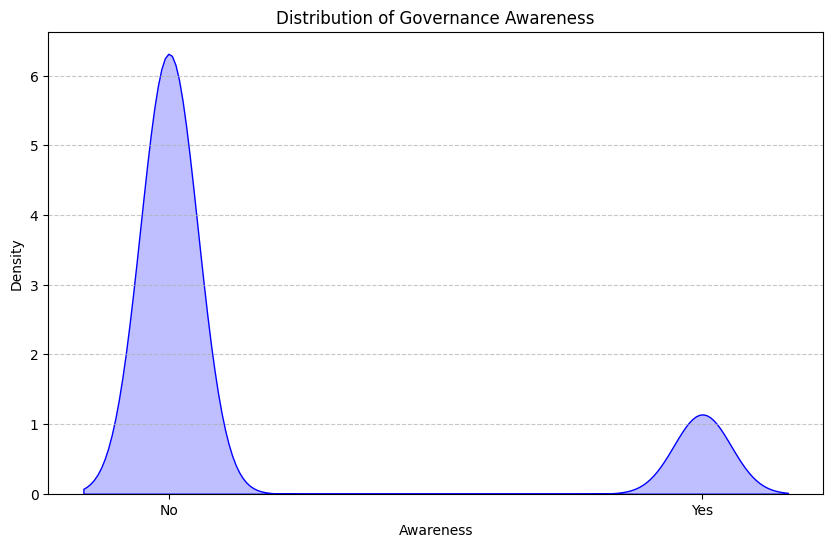

In [1]:
import os
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from dotenv import load_dotenv
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load environment variables and data
load_dotenv()
excel_file_path = os.getenv('EXCEL_FILE_PATH')
df = pd.read_excel(excel_file_path)

# Prepare dependent variable
y = df['HHB2: Are you aware of any rangeland governance policies in your area? ']
y = y.map({'Yes': 1, 'No': 0})

# Count occurrences of each response
counts = y.value_counts().sort_index()
labels = np.array([0, 1])  # 0 for 'No', 1 for 'Yes'
counts = counts.values

# Polynomial Regression for a smooth curve
poly_features = PolynomialFeatures(degree=2) 
X_poly = poly_features.fit_transform(labels.reshape(-1, 1))
model = LinearRegression()
model.fit(X_poly, counts)

# Generate smooth curve values
x_range = np.linspace(0, 1, 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
y_poly_pred = model.predict(x_range_poly)

# Create the plot
plt.figure(figsize=(10, 6))
sns.kdeplot(y, fill=True, color='blue', bw_adjust=0.5)  # KDE for smooth curve
plt.title('Distribution of Governance Awareness')
plt.xlabel('Awareness')
plt.ylabel('Density')
plt.xticks([0, 1], ['No', 'Yes'])  # Set custom x-ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()